In [43]:
import pandas as pd 
import numpy as np
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
x = df[['Annual Income (k$)' , 'Spending Score (1-100)']].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

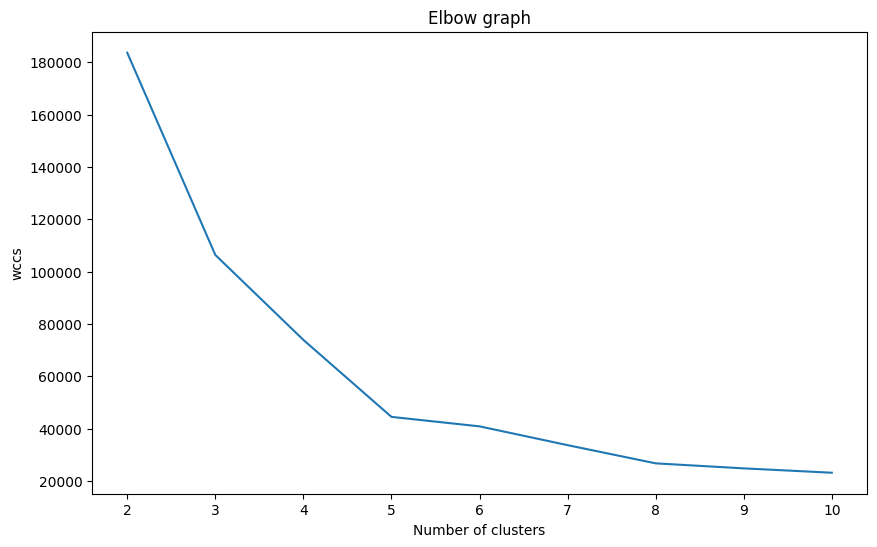

In [48]:
#choosing the optimal number of clusters using wcss 

wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i , init= 'k-means++', max_iter=50 , random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#plot a elbow graph

plt.figure(figsize=(10 ,6))
plt.plot(range(2,11) , wcss , marker = '')
plt.xlabel("Number of clusters")
plt.ylabel("wccs")
plt.title('Elbow graph')
plt.show()

According to elbow graph the optimum number of cluster is 5 because there is no signifacnt drop after 5

In [49]:
#training the model using k = 5

kmeans = KMeans(n_clusters=5 , random_state= 42 , init='k-means++')
labels = kmeans.fit_predict(x)
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


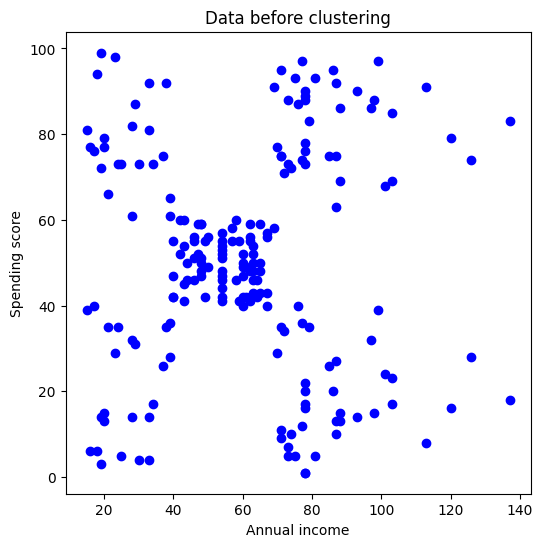

In [50]:
import matplotlib.pyplot as plt

# Scatter plot of the data before clustering
plt.figure(figsize=(6, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='blue')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Data before clustering')
plt.show()

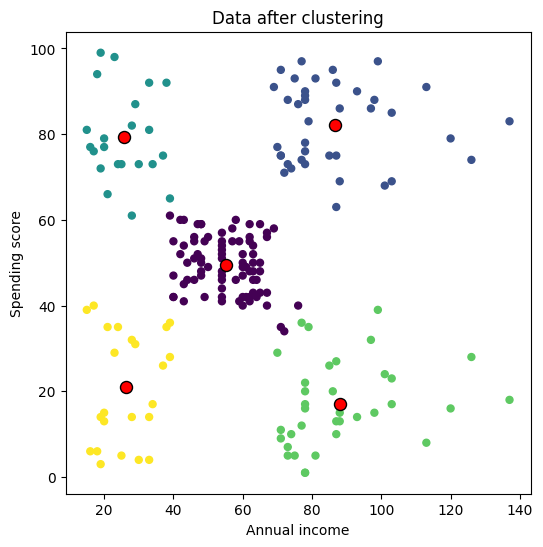

In [51]:
# Scatter plot of the data after clustering
plt.figure(figsize=(6, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis' , s = 25)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=75, c='red' , edgecolors= 'black')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Data after clustering')
plt.show()

> Here we can see that the yellow cluster has less annual income and less spending score so we can give some exciting offers to make them spend more 

> Whereas the green color have high annual income but less spending score , so we need to attract them to spend more 

> Similary other customers also shud be targeted based on their income and spending score

In [55]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])